$$ {\huge \text{ Disciplina: Lógica Fuzzy }}\\  \\  \large{\text{REGRAS FUZZY}}\\
\ \  \ \ \ \ 
\\
 { \it  \text{ Discente: Prof. Dr. João Fernando }  }
 \\
\text{ Monitor: Arnaldo Araújo} \\
\text{ Mestrado e Doutorado em Ciências da Computação - UFC }$$



In [42]:
#importar os pacotes necessários
import numpy as np
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
%matplotlib inline 


## Explorando a implicação Zadeh (P ->Q ): { max [ (notP), min(P,Q)] }

### Raciocínio Aproximado 

#### Exemplo 5.09/5.10 Livro Texto

Suponhamos que estamos avaliando uma nova invenção para determinar seu potencial comercial. Vamos usar duas métricas: originalidade e impacto. Ou seja, determinar o potencial inovador do produto de acordo com a sua originalidade e pessoas impactadas. 

In [43]:
#Escala de inovação/originalidade
X =  np.arange(1,5,1)
#Escala tamanho de mercado
Y = np.arange(1,7,1)


In [44]:
#Conjunto inovação média
A = np.array([0.0,0.6,1,0.2])
#conjunto tamanho de mercado médio
B =  np.array([0.0,0.4,1,0.8,0.3,0.0])

In [45]:
A

array([ 0. ,  0.6,  1. ,  0.2])

In [46]:
B

array([ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ])

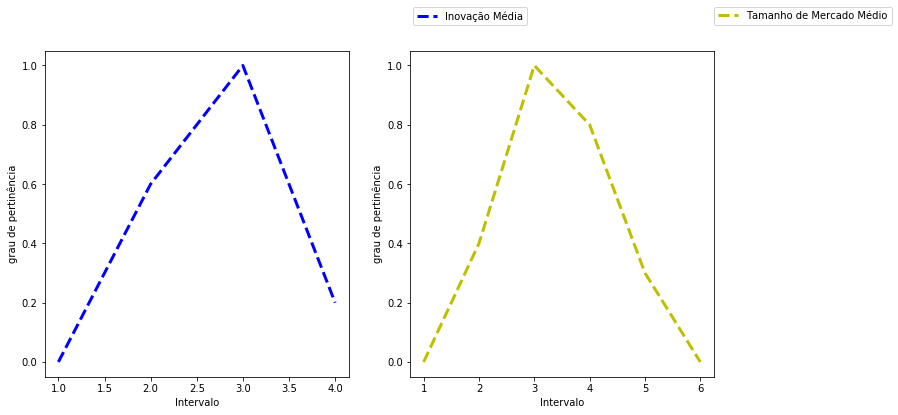

In [47]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
hax = fig.add_subplot(122)

ax.plot(X,A,'b--',linewidth=3,label='Inovação Média')
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Intervalo')
ax.set_ylim(-0.05, 1.05);
ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.60, 1.15))


hax.plot(Y,B,'y--',linewidth=3,label='Tamanho de Mercado Médio')
hax.set_ylabel('grau de pertinência')
hax.set_xlabel('Intervalo')
hax.set_ylim(-0.05, 1.05);




hax.legend(loc='upper right')
hax.legend(bbox_to_anchor=(1.60, 1.15))

plt.show()

## Sabendo que A->B, como faríamos para encontrar um B' quando temos um novo A'???

## Determinar R que expressa A->B 



In [48]:
# se x está em A então y está em B
AxB = fuzz.cartprod(A,B)
AxB

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.4,  0.6,  0.6,  0.3,  0. ],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0. ,  0.2,  0.2,  0.2,  0.2,  0. ]])

In [49]:
notA =  fuzz.fuzzy_not(A)
notA

array([ 1. ,  0.4,  0. ,  0.8])

In [50]:

notAXY = fuzz.cartprod(notA,Y)
notAXY

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0.4,  0.4,  0.4,  0.4,  0.4,  0.4],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.8,  0.8,  0.8,  0.8,  0.8,  0.8]])

In [51]:
R = np.fmax(AxB,notAXY)
R

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0.4,  0.4,  0.6,  0.6,  0.4,  0.4],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0.8,  0.8,  0.8,  0.8,  0.8,  0.8]])

### DADO UM CONJUNTO QUASE INOVAÇÃO ( A2 ) - >
### Inferir o novo conjunto para tamanho de mercado

In [52]:
#definindo o novo conjunto (quase alta inovação)
A2 = np.array([0.5, 1,0.3,0])
A2

array([ 0.5,  1. ,  0.3,  0. ])

In [53]:
B2 = fuzz.maxmin_composition(A2,R)
B2

array([[ 0.5,  0.5,  0.6,  0.6,  0.5,  0.5]])

$\Large{\text{Outras Formas de Implicação}} \\  \ \ \ \ \ $


$ \large{\text{Considere que } R = A \rightarrow B}$

In [54]:
#implicação Clássica - max(B,1-A) ??????
ImpCla = fuzz.fuzzymath.classic_relation(A,B) # Implicação Zadeh
ImpCla                                        #max[AandB,1 - A]



array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0.4,  0.4,  0.6,  0.6,  0.4,  0.4],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0.8,  0.8,  0.8,  0.8,  0.8,  0.8]])

In [55]:
def ImplClassica(C1,C2): #max(B,1-A)
    l = C1.shape[0]
    c = C2.shape[0]
    NotC1 = fuzz.fuzzy_not(C2)
    ICl = np.zeros((l,c))
    for i in range(l):
        for j in range(c):
            ICl[i,j] = max(C2[j],NotC1[i])
    return ICl
    

In [56]:
TesImp = ImplClassica(A,B)
TesImp

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0.6,  0.6,  1. ,  0.8,  0.6,  0.6],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0.2,  0.4,  1. ,  0.8,  0.3,  0.2]])

In [57]:
#implicação Mamdani  - min(A,B)
ImplMamd = fuzz.fuzzymath.cartprod(A,B)
ImplMamd

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.4,  0.6,  0.6,  0.3,  0. ],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0. ,  0.2,  0.2,  0.2,  0.2,  0. ]])

In [58]:
#implicação Lukasiewicz

def Lukasiewicz(C1,C2):
    l = C1.shape[0]
    c = C2.shape[0]
    Luk = np.ones((l,c))
    for i in range(l):
        for j in range(c):
            Luk[i,j] = min(1,abs(1-(C1[i]+C2[j])))
    return Luk
            

In [59]:
A

array([ 0. ,  0.6,  1. ,  0.2])

In [60]:
B

array([ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ])

In [61]:
ImplLuk = Lukasiewicz(A,B)
ImplLuk

array([[ 1. ,  0.6,  0. ,  0.2,  0.7,  1. ],
       [ 0.4,  0. ,  0.6,  0.4,  0.1,  0.4],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0.8,  0.4,  0.2,  0. ,  0.5,  0.8]])

In [62]:
#Implicação Correlação Produto

def CoPr(C1,C2):
    l = C1.shape[0]
    c = C2.shape[0]
    CP = np.ones((l,c))
    for i in range(l):
        for j in range(c):
            CP[i,j] = (C1[i]*C2[j])
    return CP

In [63]:
ImplCorPro = CoPr(A,B)
ImplCorPro

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.24,  0.6 ,  0.48,  0.18,  0.  ],
       [ 0.  ,  0.4 ,  1.  ,  0.8 ,  0.3 ,  0.  ],
       [ 0.  ,  0.08,  0.2 ,  0.16,  0.06,  0.  ]])

In [64]:
#implicação Broweriana
def Broweriana(C1,C2):
    l = C1.shape[0]
    c = C2.shape[0]
    Brow = np.ones((l,c))
    for i in range(l):
        for j in range(c):
                if C1[i] <= C2[j]:
                    Brow[i,j] = 1
                else:
                    Brow[i,j] = C2[j]
    return Brow


In [65]:
ImpBrow = Broweriana(A,B)
ImpBrow

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [ 0. ,  0.4,  1. ,  1. ,  0.3,  0. ],
       [ 0. ,  0.4,  1. ,  0.8,  0.3,  0. ],
       [ 0. ,  1. ,  1. ,  1. ,  1. ,  0. ]])

$$ \ \ \ \ \ \ \ \ \ \ \ \\
{\huge \text{ Representação do Conhecimento } }\\
\ \  \ \ \ \ 
\\
 { \it  \text{ Modificadores Linguísticos } }$$



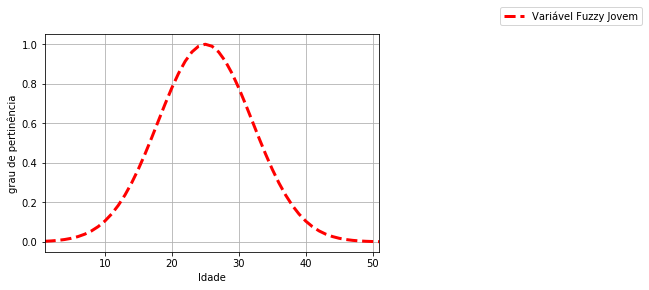

In [66]:
idade = np.arange(1,101,1)
jovem = fuzz.gaussmf(idade,25,10)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variável Fuzzy Jovem')

ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

# Contrações

$\large{\text{MUITO } \alpha = \alpha^2}$


$ \large{\text{MUITO MUITO } \alpha = \alpha^4}$ 


$ \large{\text{MAIS } \alpha = \alpha^{1,25}}$ 

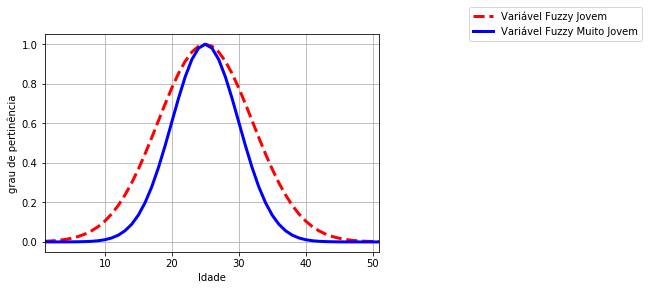

In [67]:
#Muito Jovem 
MuitoJovem = jovem**(2)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variável Fuzzy Jovem')
ax.plot(idade,MuitoJovem,'b',linewidth=3,label='Variável Fuzzy Muito Jovem')
ax.plot(idade,)
ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

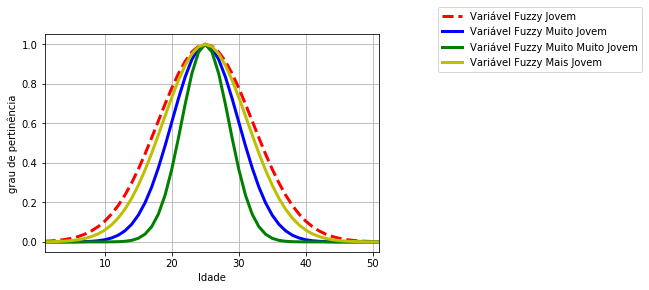

In [68]:
#Muito Muito Jovem 
MuitoMuitoJovem = jovem**(4)
MaisJovem = jovem**(1.25)

fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variável Fuzzy Jovem')
ax.plot(idade,MuitoJovem,'b',linewidth=3,label='Variável Fuzzy Muito Jovem')
ax.plot(idade,MuitoMuitoJovem,'g',linewidth=3,label='Variável Fuzzy Muito Muito Jovem')
ax.plot(idade,MaisJovem,'y',linewidth=3,label='Variável Fuzzy Mais Jovem')

ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

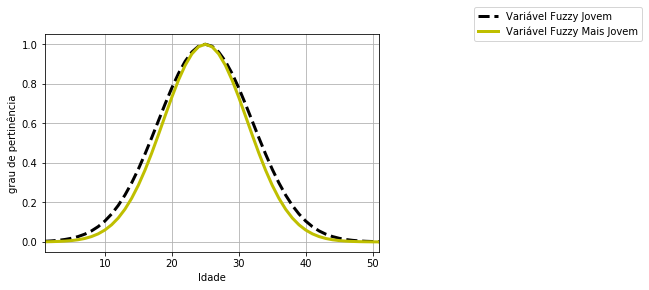

In [69]:
#mais Jovem 
MaisJovem = jovem**(1.25)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'k--',linewidth=3,label='Variável Fuzzy Jovem')
ax.plot(idade,MaisJovem,'y',linewidth=3,label='Variável Fuzzy Mais Jovem')

ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

#### Dilatações 

$\large{\text{ LIGEIRAMENTE }  \alpha = \sqrt{\alpha}}$

 $ \large{\text{MENOS } \alpha = \alpha^{0.75}}$ 

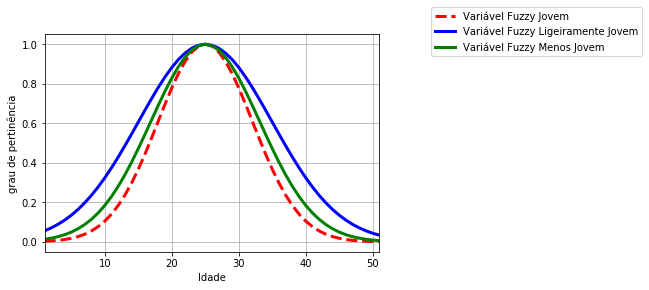

In [70]:
LigeiramenteJovem = jovem**(0.5)
MenosJovem = jovem**(0.75)
fig,ax = plt.subplots()

ax.plot(idade,jovem,'r--',linewidth=3,label='Variável Fuzzy Jovem')
ax.plot(idade,LigeiramenteJovem,'b',linewidth=3,label='Variável Fuzzy Ligeiramente Jovem')
ax.plot(idade,MenosJovem,'g',linewidth=3,label='Variável Fuzzy Menos Jovem')

ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

#### Intensificação

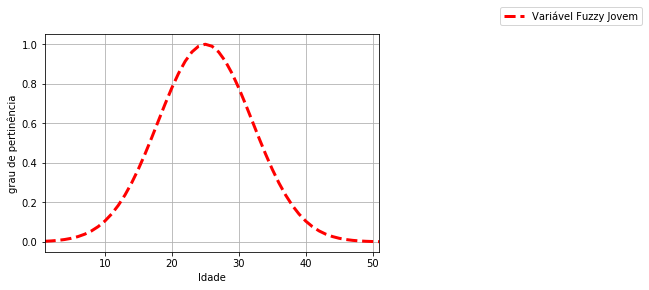

In [71]:
idade = np.arange(1,101,1)
jovem = fuzz.gaussmf(idade,25,10)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'r--',linewidth=3,label='Variável Fuzzy Jovem')

ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

In [72]:
def Intensifica(X):
    tam = X.shape[0]
    IntenX = np.ones(tam)
    for i in range(tam):
        if X[i] <= 0.5:
            IntenX[i] = 2*((X[i]))**2
        else:
            IntenX[i] = 1-2*((1-(X[i]))**2)
    return IntenX
    

In [73]:
jovemInten = Intensifica(jovem)
jovemInten

array([  1.98590086e-05,   5.08386930e-05,   1.25043008e-04,
         2.95496720e-04,   6.70925256e-04,   1.46360484e-03,
         3.06762136e-03,   6.17743082e-03,   1.19520458e-02,
         2.22179931e-02,   3.96821895e-02,   6.80949095e-02,
         1.12269526e-01,   1.77843235e-01,   2.70670566e-01,
         3.95797398e-01,   5.53095095e-01,   6.99883379e-01,
         8.17200792e-01,   9.02141813e-01,   9.56277082e-01,
         9.85184318e-01,   9.96925064e-01,   9.99801988e-01,
         1.00000000e+00,   9.99801988e-01,   9.96925064e-01,
         9.85184318e-01,   9.56277082e-01,   9.02141813e-01,
         8.17200792e-01,   6.99883379e-01,   5.53095095e-01,
         3.95797398e-01,   2.70670566e-01,   1.77843235e-01,
         1.12269526e-01,   6.80949095e-02,   3.96821895e-02,
         2.22179931e-02,   1.19520458e-02,   6.17743082e-03,
         3.06762136e-03,   1.46360484e-03,   6.70925256e-04,
         2.95496720e-04,   1.25043008e-04,   5.08386930e-05,
         1.98590086e-05,

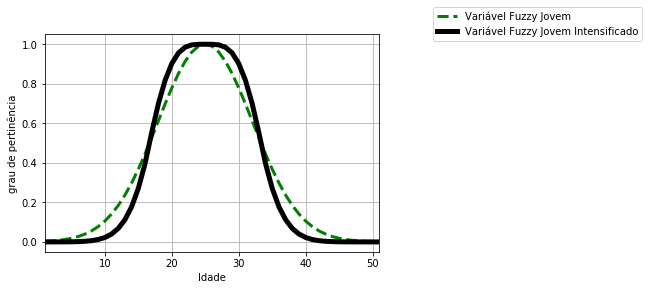

In [77]:
idade = np.arange(1,101,1)
jovem = fuzz.gaussmf(idade,25,10)
fig,ax = plt.subplots()
ax.plot(idade,jovem,'g--',linewidth=3,label='Variável Fuzzy Jovem')
ax.plot(idade,jovemInten,'k',linewidth=5,label='Variável Fuzzy Jovem Intensificado')

ax.set_ylabel('grau de pertinência')
ax.set_xlabel('Idade')
ax.set_ylim(-0.05, 1.05);

ax.legend(loc='upper right')
ax.legend(bbox_to_anchor=(1.80, 1.15))
ax.grid(True)
plt.xlim(1,51,1.0)
#plt.xticks(range(1,12))
plt.show()

## Exemplo Cálculo Gorjeta pela qualidade da comida e do serviço

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


OrderedDict([('tip', 13.695754222725178)])


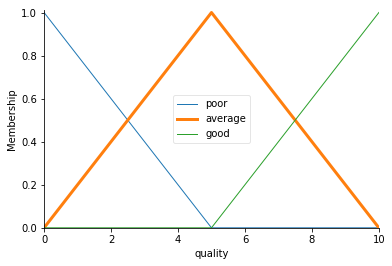

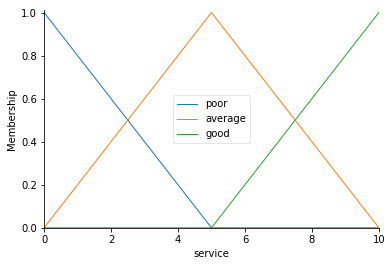

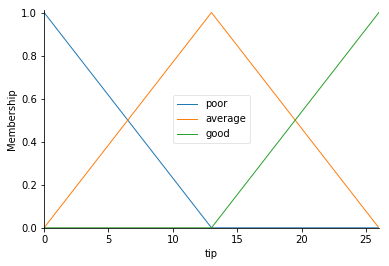

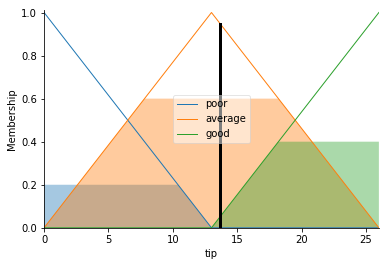

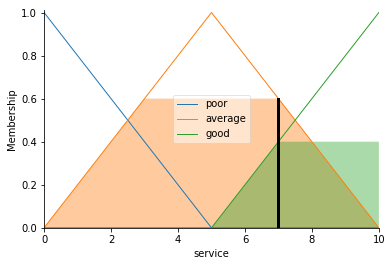

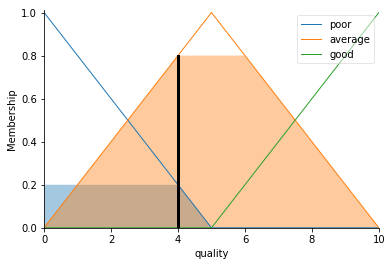

In [35]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


# New Antecedent/Consequent objects hold universe variables and membership functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 27, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar, Pythonic API
tip['poor'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['average'] = fuzz.trimf(tip.universe, [0, 13, 26])
tip['good'] = fuzz.trimf(tip.universe, [13, 26, 26])

# You can see how these look with .view()
quality['average'].view()
service.view()
tip.view()

# Rule objects connect one or more antecedent membership functions with
# one or more consequent membership functions, using 'or' or 'and' to combine the antecedents.
#   * rule1: "If food is poor OR services is poor, then tip will be poor
#   * rule2: "If service is average, then tip will be average
#   * rule3: "If service is good OR food is good, then tip will be good
# & (AND) - O "E" Comercial representa o AND
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['poor'])
rule2 = ctrl.Rule(service['average'], tip['average'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['good'])

# Create a new ControlSystem with these rules added
# Note: it is possible to create an empty ControlSystem() and build it up interactively.
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# View the whole system

#tipping_ctrl.view()

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 4.0   #0
tipping.input['service'] = 7.0  #10.0
    
# Crunch the numbers
tipping.compute()

# Output available as a dict, for arbitrary number of consequents
print(tipping.output)
#tipping.print_state()
# Viewing the Consequent again after computation shows the calculated system
tip.view(sim=tipping)
service.view(sim=tipping)

quality.view(sim=tipping)

###############
# More sophesticated system

# Inputs: qualtiy, service, decor
# Outpus: Tip
# Intermediary: ambiance
